In [ ]:
! pip install astroNN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.3 MB 3.4 MB/s 
     |████████████████████████████████| 4.5 MB 36.5 MB/s 
     |████████████████████████████████| 832 kB 42.4 MB/s 
     |████████████████████████████████| 48 kB 3.0 MB/s 
     |████████████████████████████████| 4.1 MB 14.6 MB/s 
  Created wheel for astroNN: filename=astroNN-1.0.1-py3-none-any.whl size=9284595 sha256=ad280af8c965e00e347165db9d904511c6c841bbc8797e314aff0e363dd39907
  Stored in directory: /root/.cache/pip/wheels/26/a4/7e/4cbf2a7f9cd51929da9d09345e8cd37c647b54825a1314dd2d
Successfully built astroNN


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras import utils

In [ ]:
from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup

WARNING! APOGEE environment variable SDSS_LOCAL_SAS_MIRROR not set
WARNING! Gaia environment variable GAIA_TOOLS_DATA not set


In [ ]:
images, labels = galaxy10.load_data()

Galaxy10.h5:  99%|█████████▊| 207M/210M [00:20<00:00, 17.1MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10.h5


Galaxy10.h5: 210MB [00:21, 9.97MB/s]                           


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

In [ ]:
features = ['Disk, Face-on, No Spiral', 'Smooth, Completely round', 'Smooth, in-between round', 'Smooth, Cigar shaped', 'Disk, Edge-on, Rounded Bulge', 'Disk, Edge-on, Boxy Bulge', 
            'Disk, Edge-on, No Bulge','Disk, Face-on, Tight Spiral', 'Disk, Face-on, Medium Spiral', 'Disk, Face-on, Loose Spiral']

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train.shape, x_test.shape

((17428, 69, 69, 3), (4357, 69, 69, 3))

In [ ]:
fig = plt.figure(figsize=(20,20)) 

<Figure size 1440x1440 with 0 Axes>

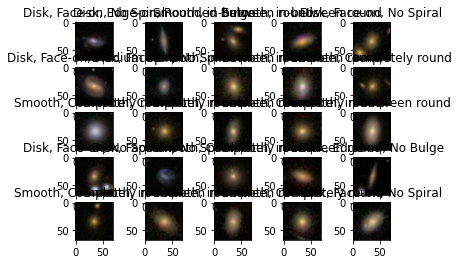

In [ ]:
for i in range(25):
    plt.subplot(5,5,i+1)    
    plt.imshow(x_train[i])
    plt.title(features[y_train[i]])
    fig.tight_layout(pad=3.0)
plt.show()


In [ ]:
df = pd.DataFrame(data=labels)


In [ ]:
counts = df.value_counts().sort_index()
print(counts)

0    3461
1    6997
2    6292
3     349
4    1534
5      17
6     589
7    1121
8     906
9     519
dtype: int64


In [ ]:
def class_distribution(x, y, labels):
    fig, ax = plt.subplots()
    ax.bar(x, y)
    ax.set_xticklabels(labels, rotation=90)
    plt.show()

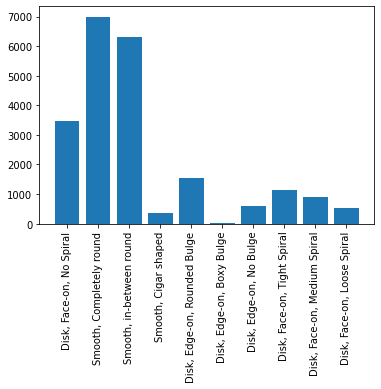

In [ ]:
class_distribution(features, counts, features)

In [ ]:
model = Sequential()

In [ ]:
model.add(Flatten(input_shape=(69, 69, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model_optimizer = Adam(lr=0.001)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.compile(optimizer=model_optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
reduceLR = ReduceLROnPlateau(monitor='accuracy', factor=.001, patience=1, min_delta=0.01, mode="auto")
lol = model.fit(x_train, y_train, epochs=10, callbacks=[reduceLR])

Epoch 1/10
545/545 [==============================] - 16s 26ms/step - loss: 1.4128 - accuracy: 0.4609 - lr: 0.0010
Epoch 2/10
545/545 [==============================] - 11s 19ms/step - loss: 1.0966 - accuracy: 0.5994 - lr: 0.0010
Epoch 3/10
545/545 [==============================] - 11s 20ms/step - loss: 0.9977 - accuracy: 0.6414 - lr: 0.0010
Epoch 4/10
545/545 [==============================] - 11s 20ms/step - loss: 0.9472 - accuracy: 0.6654 - lr: 0.0010
Epoch 5/10
545/545 [==============================] - 11s 20ms/step - loss: 0.8945 - accuracy: 0.6830 - lr: 0.0010
Epoch 6/10
545/545 [==============================] - 11s 20ms/step - loss: 0.8633 - accuracy: 0.6931 - lr: 0.0010
Epoch 7/10
545/545 [==============================] - 11s 20ms/step - loss: 0.8239 - accuracy: 0.7119 - lr: 0.0010
Epoch 8/10
545/545 [==============================] - 11s 20ms/step - loss: 0.8009 - accuracy: 0.7158 - lr: 0.0010
Epoch 9/10
545/545 [==============================] - 12s 21ms/step - loss: 0.76

In [ ]:
model2 = Sequential()

In [ ]:
model2.add(Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), activation='tanh', input_shape=(69,69,3)))
model2.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model2.add(Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='tanh'))
model2.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))

In [ ]:
model2.add(Flatten())
model2.add(Dense(units=120, activation='tanh'))
model2.add(Dense(units=84, activation='tanh'))
model2.add(Dense(units=10, activation='softmax'))

In [ ]:
model_optimizer = Adam(lr=0.001)

In [ ]:
reduceLR = ReduceLROnPlateau(monitor='accuracy', factor=.001, patience=1, min_delta=0.01, mode="auto")


In [ ]:
model2.compile(optimizer=model_optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
model2.fit(x_train, y_train, epochs=10, callbacks=[reduceLR])


Epoch 1/10
545/545 [==============================] - 80s 147ms/step - loss: 1.2698 - accuracy: 0.5102 - lr: 0.0010
Epoch 2/10
545/545 [==============================] - 80s 147ms/step - loss: 0.8698 - accuracy: 0.6856 - lr: 0.0010
Epoch 3/10
545/545 [==============================] - 84s 154ms/step - loss: 0.7627 - accuracy: 0.7210 - lr: 0.0010
Epoch 4/10
545/545 [==============================] - 80s 147ms/step - loss: 0.6732 - accuracy: 0.7542 - lr: 0.0010
Epoch 5/10
545/545 [==============================] - 80s 147ms/step - loss: 0.6004 - accuracy: 0.7816 - lr: 0.0010
Epoch 6/10
545/545 [==============================] - 83s 152ms/step - loss: 0.5280 - accuracy: 0.8100 - lr: 0.0010
Epoch 7/10
545/545 [==============================] - 80s 146ms/step - loss: 0.4725 - accuracy: 0.8280 - lr: 0.0010
Epoch 8/10
545/545 [==============================] - 80s 147ms/step - loss: 0.4003 - accuracy: 0.8573 - lr: 0.0010
Epoch 9/10
545/545 [==============================] - 83s 153ms/step - l

In [ ]:
predict = model2.predict(x_test).argmax(axis=1)

for i in range(10):
    print("Actual:", features[y_test[i]])
    print("Prediction:", features[np.argmax(predict[i])])
    print("-----")
    print()

137/137 [==============================] - 11s 75ms/step
Actual: Smooth, in-between round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, No Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, in-between round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, Tight Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, No Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, No Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, Completely round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, Completely round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Edge-on, Rounded Bulge
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, No Spiral
Prediction: Disk, Face-on, No Spiral
-----



In [ ]:
classification_report(y_test, predict)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.53      0.44      0.48       721\n           1       0.89      0.90      0.90      1387\n           2       0.78      0.89      0.83      1226\n           3       0.51      0.40      0.45        89\n           4       0.68      0.89      0.77       290\n           5       0.00      0.00      0.00         4\n           6       0.83      0.54      0.65       134\n           7       0.45      0.42      0.43       240\n           8       0.40      0.36      0.38       161\n           9       0.50      0.23      0.31       105\n\n    accuracy                           0.74      4357\n   macro avg       0.56      0.51      0.52      4357\nweighted avg       0.72      0.74      0.73      4357\n'

Text(33.0, 0.5, 'True class')

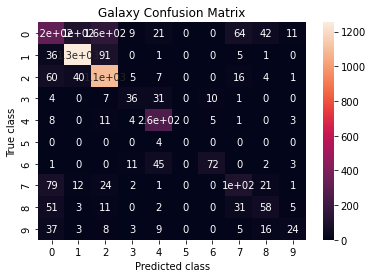

In [ ]:
matrix = confusion_matrix(y_test, predict)
sns.heatmap(matrix, annot=True)
plt.title('Galaxy Confusion Matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')